### LIBRARIES

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

#### Create an Erdons Renyi Random Graph

In [2]:
er = nx.erdos_renyi_graph(n = 30, p= 0.2, seed = 21)

#### Create an Barabasi Albert Graph

In [3]:
ba = nx.barabasi_albert_graph(n = 30, m = 2, seed = 21)

#### Fast plot of the networks

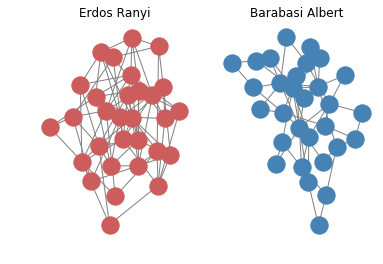

In [4]:
plt.subplot(1, 2, 1)
nx.draw(er, edge_color = "grey", node_color = "indianred")
plt.title('Erdos Ranyi')

plt.subplot(1, 2, 2)
nx.draw(ba, edge_color = "grey", node_color = "steelblue")
plt.title('Barabasi Albert')


plt.show()

#### Total degree

In [5]:
def tot_degree(G):
    tot_deg = 0
    for i in range (0, len(G)):
        for j in range (0, len(G)):
            tot_deg += G.number_of_edges(i, j)
    return tot_deg

print('Total degree of Erdos Ranyi network:', tot_degree(er))
print('Total degree of Barabasi Albert network:', tot_degree(ba))

Total degree of Erdos Ranyi network: 176
Total degree of Barabasi Albert network: 112


#### Calculate average degree

In [6]:
def avg_degree(G):
    avg_degree = tot_degree(G)/len(G)
    return avg_degree

print('Average degree of Erdos Ranyi network:', round(avg_degree(er),4))
print('Average degree of Barabasi Albert network:', round(avg_degree(ba),4))

Average degree of Erdos Ranyi network: 5.8667
Average degree of Barabasi Albert network: 3.7333


#### Degree distribution

In [7]:
def degrees(G):
    degrees = []
    for i in range(0, len(G)):
        degrees.append(G.degree(i))
    return degrees

#### Plotting a histogram

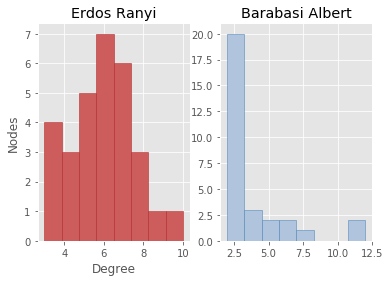

In [11]:
#Erdos Ranyi
plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.hist(degrees(er), bins = 8,
         color = 'indianred',        
         edgecolor = 'firebrick')
plt.title('Erdos Ranyi')

#labels
plt.xlabel('Degree')
plt.ylabel('Nodes')

#Barabasi Albert
plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.hist(degrees(ba), bins = 8,
         color = 'lightsteelblue',
         edgecolor = 'steelblue')
plt.title('Barabasi Albert')



plt.show()

#### Plotting a density graph

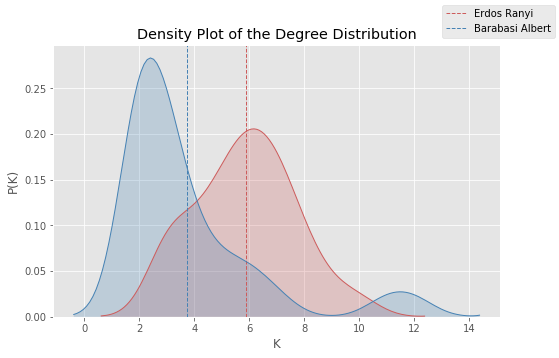

In [12]:
fig = plt.figure(figsize=(8,5))

#Erdos Ranyi
sns.distplot(degrees(er), hist = False, kde = True,
             color = 'indianred',
           kde_kws = {'shade': True,
                          'linewidth': 1})

plt.axvline(avg_degree(er), 
            color = 'indianred',
           linestyle = 'dashed',
           linewidth = 1)

#Barabasi Albert
sns.distplot(degrees(ba), hist = False, kde = True,
             color = 'steelblue',
           kde_kws = {'shade': True,
                          'linewidth': 1})
plt.axvline(avg_degree(ba), 
            color = 'steelblue',
           linestyle = 'dashed',
           linewidth = 1)

#Titles, labels and legen
plt.xlabel('K')
plt.ylabel('P(K)')
plt.title('Density Plot of the Degree Distribution')
fig.legend(labels=['Erdos Ranyi','Barabasi Albert'])
plt.show()

<h2 align="center">Building the Clustering Coefficient<h2>

#### Formula:

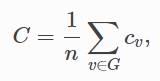

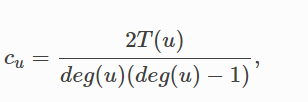

<blockquote>(1) Calculating the denominator and appending it into a list: </blockquote>

In [13]:
def max_edges(G):
    medges = []
    for i in range(0, len(G)):
        medges.append(G.degree(i)*(G.degree(i)-1))
    return medges

<blockquote>(2) Calculating the nominator and appending it into a list: </blockquote>

In [14]:
def triangles(G):
    list_friends = []
    list_mine = []
    triangles = 0
    triangles_list = []

    for m in range (0, len(G)):
        for i in range(0, len(G)):
            if G.number_of_edges(m, i) > 0 and m!=i:
                list_mine.append(i)
                for j in range(0, len(G)):
                    if G.number_of_edges(i,j) > 0 and i != j:
                        list_friends.append(j)

        # calculate the amount of edges in common among neigh.
        for z in range(0, len(list_mine)):
            for k in range(0, len(list_friends)):
                if list_mine[z]==list_friends[k]:
                    triangles += 1
        triangles_list.append(triangles)
        triangles = 0
        list_friends = []
        list_mine = []
    return triangles_list

<blockquote>(3) Putting it all together: </blockquote>

In [15]:
def clust_coef(G):   
    Cu = []
    for i in range(0, len(G)):
        Cu.append(triangles(G)[i]/max_edges(G)[i])
    net_cc = round(sum(Cu)/len(G), 4)
    return net_cc

In [16]:
print("Clustering coefficient of Erdos Ranyi:", clust_coef(er))
print("Clustering coefficient of Barabasi Albert:", clust_coef(ba))

Clustering coefficient of Erdos Ranyi: 0.1339
Clustering coefficient of Barabasi Albert: 0.1891


<blockquote>(4) Visualizing it: </blockquote>

How to choose the diameter of circles: <a> https://infonewt.com/circles/ </a>


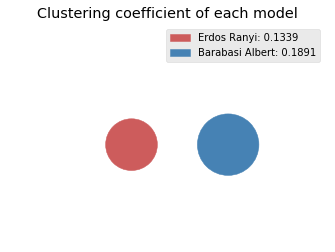

In [17]:
circle1 = plt.Circle((0, 0), 2*(clust_coef(er)), color='indianred')
circle2 = plt.Circle((1, 0), 2*(clust_coef(er)*math.sqrt(clust_coef(ba)/clust_coef(er))), color='steelblue')

fig, ax = plt.subplots()

plt.xlim(-1.25,2)
plt.ylim(-1,1.25)

ax.set_aspect(1)
ax.set_facecolor('xkcd:white')
ax.tick_params(labelbottom=False, labelleft =False, bottom = False, left = False)
ax.legend((circle1, circle2), ('Erdos Ranyi: {}'.format(clust_coef(er)), 'Barabasi Albert: {}'.format(clust_coef(ba))))
plt.title('Clustering coefficient of each model')

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.show()

### Extra metrics

In [18]:
#Clustering coefficient
cc_er = nx.average_clustering(er)
cc_ba = nx.average_clustering(ba)

In [19]:
#Average path length: Measures the average distance of the shortest path between every pair of nodes.
apl_er = nx.average_shortest_path_length(er)
apl_ba = nx.average_shortest_path_length(ba)

In [20]:
#Assortativity: Measures the similarity of connections in the graph with respect to the node degree.
ast_er = nx.degree_assortativity_coefficient(er)
ast_ba = nx.degree_assortativity_coefficient(ba)

In [21]:
#Density: Measures the ratio between the amount of edges versus the total possible amount of edges.
den_er = nx.density(er)
den_ba = nx.density(ba)

In [22]:
data = {'Model':  ['Erdos Ranyi', 'Barabasi Albert'],
        'Average Degree': [round(avg_degree(er),4), round(avg_degree(ba),4)],
        'Clustering': [round(cc_er,4), round(cc_ba,4)],
        'Average Path Length': [round(apl_er,4), round(apl_ba,4)],
        'Assortativity': [round(ast_er,4), round(ast_ba,4)],
        'Density': [round(den_er,4), round(den_ba,4)]
        }
df = pd.DataFrame(data)
df

,Model,Average Degree,Clustering,Average Path Length,Assortativity,Density
0,Erdos Ranyi,5.8667,0.1339,2.0115,-0.0593,0.2023
1,Barabasi Albert,3.7333,0.1891,2.4690,-0.1588,0.1287


### Calculating and plotting centrality measures

In [478]:
#run the plot function below first

#### DEGREE CENTRALITY

In [24]:
df_er = pd.DataFrame(degrees(er), columns = ['Degrees'])
df_ba = pd.DataFrame(degrees(ba), columns = ['Degrees'])

In [25]:
# reorder df, to assign the good color to each node
df_er = df_er.reindex(er.nodes())
df_ba = df_ba.reindex(ba.nodes())

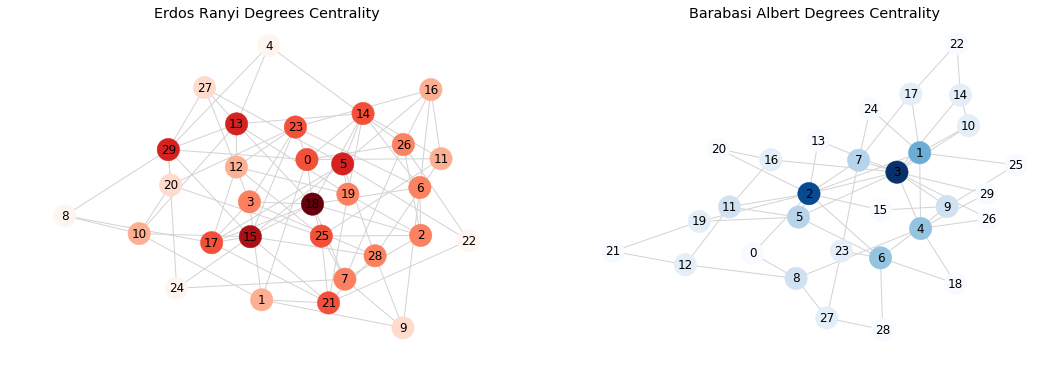

In [26]:
plots('Degrees')

#### EIGENVECTOR CENTRALITY

In [27]:
eigenvector_centrality_er = nx.eigenvector_centrality(er)
eigenvector_centrality_ba = nx.eigenvector_centrality(ba)

In [28]:
# Saving just the eigenvector values in the data frames
eigenvector_centrality_er = [(eigenvector_centrality_er[node]) for node in eigenvector_centrality_er]
eigenvector_centrality_ba = [(eigenvector_centrality_ba[node]) for node in eigenvector_centrality_ba]

In [29]:
df_er['Eigenvector'] = eigenvector_centrality_er
df_ba['Eigenvector'] = eigenvector_centrality_ba

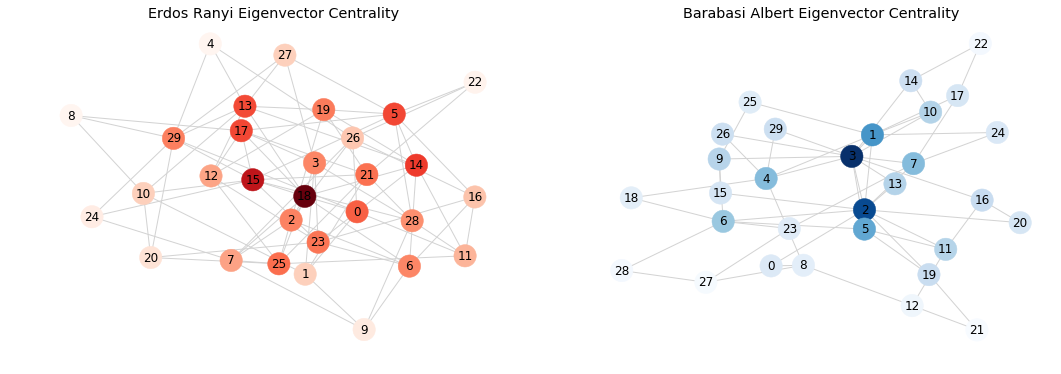

In [30]:
plots('Eigenvector')

#### CLOSENESS CENTRALITY

In [31]:
closeness_er = nx.closeness_centrality(er)
closeness_ba = nx.closeness_centrality(ba)

In [32]:
# Saving just the closeness values in the data frames
closeness_er = [(closeness_er[node]) for node in closeness_er]
closeness_ba = [(closeness_ba[node]) for node in closeness_ba]

In [33]:
df_er['Closeness'] = closeness_er
df_ba['Closeness'] = closeness_ba

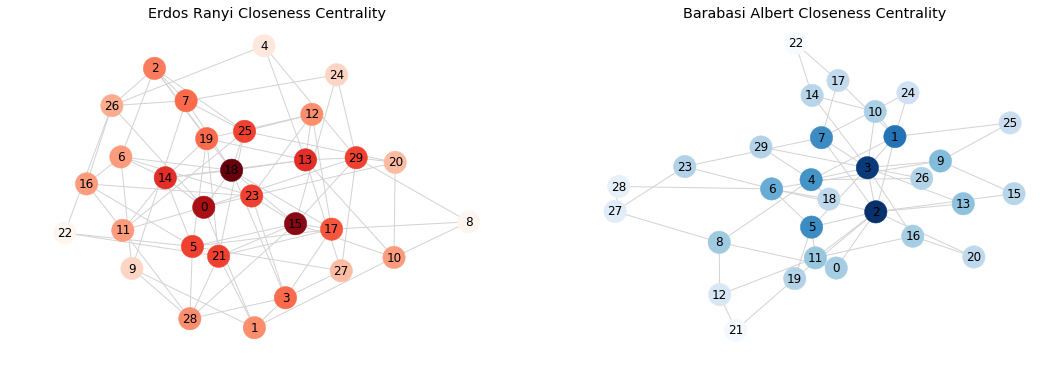

In [34]:
plots('Closeness')

#### BETWEENNESS CENTRALITY

In [35]:
betweenness_er = nx.betweenness_centrality(er)
betweenness_ba = nx.betweenness_centrality(ba)

In [36]:
# Saving just the betweenness values in the data frames
betweenness_er = [(betweenness_er[node]) for node in betweenness_er]
betweenness_ba = [(betweenness_ba[node]) for node in betweenness_ba]

In [37]:
df_er['Betweenness'] = betweenness_er
df_ba['Betweenness'] = betweenness_ba

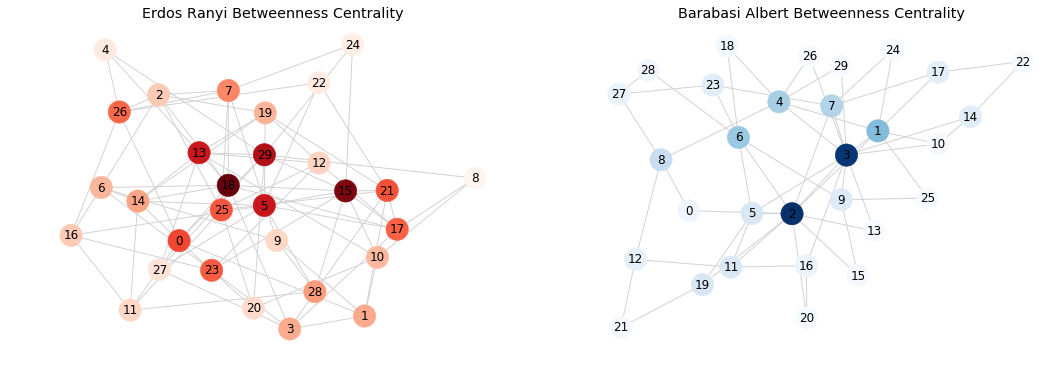

In [38]:
plots('Betweenness')

#### Plot function

In [39]:
def plots(centrality):
    fig = plt.figure(figsize=(18,6))
    #Erdos Ranyi
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(er)
    colors = df_er[centrality]
    options = {
        "node_color": colors,
        "node_size": 500,
        "edge_color": 'lightgrey',
        "width": 1,
        "cmap": plt.cm.Reds,
        "with_labels": True,
    }


    nx.draw(er, pos, **options)
    plt.title('Erdos Ranyi {} Centrality'.format(centrality))


    #Barabasi Albert
    plt.subplot(1, 2, 2)
    pos = nx.spring_layout(ba)
    colors = df_ba[centrality]
    options = {
        "node_color": colors,
        "node_size": 500,
        "edge_color": 'lightgrey',
        "width": 1,
        "cmap": plt.cm.Blues,
        "with_labels": True,
    }


    nx.draw(ba, pos, **options)
    plt.title('Barabasi Albert {} Centrality'.format(centrality))

    plt.show()